In [1]:
import numpy as np
import pandas as pd
import random as rnd

%matplotlib inline
import matplotlib.pyplot as plt

train_df = pd.read_csv('C:/Users/Kong/Desktop/이지민/AI/심리_성향_예측_AI/train.csv')

test_df = pd.read_csv('C:/Users/Kong/Desktop/이지민/AI/심리_성향_예측_AI/test_x.csv')

< 범주형 데이터 전처리 >

* 레이블 인코딩
    - 범주형 값을 내림차순 정렬 후 0부터 1씩 증가하는 값으로 변환
    - 숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에 적용한다.
    - 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, svm, 신경망)에는 사용하면 안된다.
    
* 원핫 인코딩
    - N개의 클래스를 N차원의 One-Hot 벡터로 표현되도록 변환
        - 고유값들을 피처로 만들고 정답에 해당하는 열은 1로 나머지는 0으로 표시
    - 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱 회귀, svm, 신경망)에서 범주형 데이터 변환 시 사용

< 연속형 데이터 전처리 >
* 정규화
    - 각 피처가 가지는 값들의 숫자 범위가 다를 경우 이 값의 범위를 일정한 범위로 맞추는 작업
    - 트리 계열을 제외한 대부분의 머신러닝 알고리즘들이 피처의 스케일에 영향을 받는다
        - 표준화 : 피처의 값들이 평균이 0이고 표준편차가 1인 범위에 있도록 변환
        - MinMaxScaler : 데이터셋의 모든 값을 0과 1 사이의 값으로 변환

참고 자료 : https://ysyblog.tistory.com/71

In [2]:
train_df.describe(include=['O'])

,age_group,gender,race,religion
count,45532,45532,45532,45532
unique,7,2,7,12
top,10s,Male,White,Atheist
freq,14215,24217,31248,10192


In [3]:
test_df.describe(include=['O'])

,age_group,gender,race,religion
count,11383,11383,11383,11383
unique,7,2,7,12
top,10s,Male,White,Atheist
freq,3603,6072,7918,2624


In [4]:
train_df = train_df.drop(['index'], axis=1)

### 누락된 데이터 다루기

##### 누락된 값 식별

In [5]:
train_df.isnull().sum()

QaA      0
QaE      0
QbA      0
QbE      0
QcA      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 77, dtype: int64

------------------------------------------------------



## 범주형 데이터 전처리



------------------------------------------------------

* 현재의 범주형 데이터
    - age_group
    - gender
    - race
    - religion

* 더미 변수 : 어떤 속성이 존재할 경우 그 값을 1로, 존재하지 않을 경우 그 값을 0으로 코딩한 인위적 변수를 의미
    - 무엇이 더 중요한지 등이 나타나지 않는 변수를 전처리할 때 유용
        - ex) 성별
        
        

##### 성별을 dummy 변수로 만들어준다
* One-Hot 인코딩

* 순서가 없는 특성에 원-핫 인코딩 적용

In [6]:
train_df = pd.get_dummies(train_df, columns = ['gender'])
test_df = pd.get_dummies(test_df, columns = ['gender'])

In [7]:
train_df

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,gender_Female,gender_Male
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,1,0,1,0,1,1,1,0
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,0,1,1,0,1,0,1,1,1,0
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,0,1,1,1,1,0,1,1,0,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,1,0,1,0,1,1,1,0
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,1050,5.0,619,4.0,328,1.0,285,1.0,602,...,0,1,1,1,1,0,1,1,1,0
45528,2.0,581,3.0,1353,4.0,1164,1.0,798,3.0,1680,...,0,1,1,1,1,0,1,1,0,1
45529,4.0,593,1.0,857,1.0,1047,4.0,1515,5.0,1690,...,0,1,1,0,1,0,1,1,1,0
45530,1.0,747,3.0,1331,4.0,892,2.0,1281,1.0,1328,...,0,1,1,1,1,0,1,1,0,1


In [8]:
train_df['age_group'].unique()

# unique()는 특정 컬럼의 유일한 값을 확인할 수 있음

array(['30s', '20s', '40s', '50s', '10s', '60s', '+70s'], dtype=object)

##### 데이터 파악하기

* 상위 5개의 행 출력 : head()
* 하위 5개의 행 출력 : tail()
* 행, 열 개수 확인 : shape()
* 전체 컬럼 출력 : columns
* 특정 컬럼의 데이터 타입 확인 : dtype
* 결측지 개수 파악 : isnull().sum()
* 특정 컬럼의 유일한 값 확인 : unique()
* 특정 컬럼의 유일 값의 개수 확인 : nunique()

참고 자료 : https://bigdaheta.tistory.com/43

##### 순서가 있는 매핑

In [9]:
train_df[['age_group', 'voted']].groupby(['age_group'], as_index=False).mean().sort_values(by='voted', ascending=False)

,age_group,voted
1,10s,1.837214
2,20s,1.469671
3,30s,1.411179
4,40s,1.357949
5,50s,1.329872
6,60s,1.271357
0,+70s,1.263830


In [10]:
age_group_mapping = {'30s' : 2, '20s' : 1, '40s' : 3, '50s' : 4, '10s' : 0, '60s' : 5, '+70s' : 6}

train_df['age_group'] = train_df['age_group'].map(age_group_mapping)
test_df['age_group'] = test_df['age_group'].map(age_group_mapping)

In [11]:
train_df.describe(include=['O'])

,race,religion
count,45532,45532
unique,7,12
top,White,Atheist
freq,31248,10192


In [12]:
test_df.describe(include=['O'])

,race,religion
count,11383,11383
unique,7,12
top,White,Atheist
freq,7918,2624


In [13]:
train_df['age_group'].unique()

array([2, 1, 3, 4, 0, 5, 6], dtype=int64)

In [14]:
train_df[['age_group', 'voted']].groupby(['age_group'], as_index=False).mean().sort_values(by='voted', ascending=False)

,age_group,voted
0,0,1.837214
1,1,1.469671
2,2,1.411179
3,3,1.357949
4,4,1.329872
5,5,1.271357
6,6,1.263830


In [15]:
train_df['race'].unique()

array(['White', 'Asian', 'Other', 'Black', 'Native American', 'Arab',
       'Indigenous Australian'], dtype=object)

In [16]:
train_df[['race', 'voted']].groupby(['race'], as_index=False
                                   ).mean().sort_values(by='voted', ascending=False)

,race,voted
0,Arab,1.709402
1,Asian,1.704565
5,Other,1.622402
2,Black,1.597786
4,Native American,1.587591
3,Indigenous Australian,1.547170
6,White,1.495776


In [17]:
race_mapping = {'White': 6, 'Asian' : 1, 'Other' : 2, 'Black' : 3, 'Native American' : 4, 'Arab' : 0,'Indigenous Australian' : 5}

train_df['race'] = train_df['race'].map(race_mapping)
test_df['race'] = test_df['race'].map(race_mapping)

In [18]:
train_df['race'].unique()

array([6, 1, 2, 3, 4, 0, 5], dtype=int64)

In [19]:
train_df['religion'].unique()

array(['Other', 'Hindu', 'Agnostic', 'Atheist', 'Christian_Other',
       'Christian_Catholic', 'Muslim', 'Buddhist', 'Christian_Protestant',
       'Jewish', 'Christian_Mormon', 'Sikh'], dtype=object)

In [20]:
train_df[['religion', 'voted']].groupby(['religion'], as_index=False).mean().sort_values(by='voted', ascending=False)

,religion,voted
9,Muslim,1.687081
11,Sikh,1.641026
2,Buddhist,1.621176
4,Christian_Mormon,1.619159
7,Hindu,1.613016
10,Other,1.582809
1,Atheist,1.572704
0,Agnostic,1.542602
5,Christian_Other,1.539615
3,Christian_Catholic,1.526512


In [21]:
religion_mapping = {'Other' : 5, 'Hindu' : 4, 'Agnostic' : 7, 'Atheist' : 6, 'Christian_Other' : 8,
       'Christian_Catholic' : 9, 'Muslim' : 0, 'Buddhist' : 2, 'Christian_Protestant' : 11,
       'Jewish' : 10, 'Christian_Mormon' : 3, 'Sikh' : 1}

train_df['religion'] = train_df['religion'].map(religion_mapping)
test_df['religion'] = test_df['religion'].map(religion_mapping)

In [22]:
train_df['religion'].unique()

array([ 5,  4,  7,  6,  8,  9,  0,  2, 11, 10,  3,  1], dtype=int64)

----------------------------------------------------


## 연속형 데이터 전처리


----------------------------------------------------


* 표준화 사용

In [23]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
"""plt.figure(figsize = (12,12))
# 그래프의 크기 결정

sns.heatmap(train_df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()"""

"plt.figure(figsize = (12,12))\n# 그래프의 크기 결정\n\nsns.heatmap(train_df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)\nplt.show()"

In [25]:
train_df[['education', 'voted']].groupby(['education'], as_index=False).mean().sort_values(by='voted', ascending=False)

,education,voted
1,1,1.950275
2,2,1.632967
0,0,1.522727
3,3,1.403494
4,4,1.380316


In [26]:
education_mapping = {1:0, 2:1, 0:2, 3:3, 4:4}

train_df['education'] = train_df['education'].map(education_mapping)
test_df['education'] = test_df['education'].map(education_mapping)

In [27]:
train_df[['education', 'voted']].groupby(['education'], as_index=False).mean().sort_values(by='voted', ascending=False)

,education,voted
0,0,1.950275
1,1,1.632967
2,2,1.522727
3,3,1.403494
4,4,1.380316


In [28]:
train_df[['engnat', 'voted']].groupby(['engnat'], as_index=False).mean().sort_values(by='voted', ascending=False)

,engnat,voted
0,0,1.623377
2,2,1.571394
1,1,1.537397


In [29]:
engnat_mapping = {0:0, 2:1, 1:2}

train_df['engnat'] = train_df['engnat'].map(engnat_mapping)
test_df['engnat'] = test_df['engnat'].map(engnat_mapping)

In [30]:
train_df[['engnat', 'voted']].groupby(['engnat'], as_index=False).mean().sort_values(by='voted', ascending=False)

,engnat,voted
0,0,1.623377
1,1,1.571394
2,2,1.537397


In [31]:
train_df[['familysize', 'voted']].groupby(['familysize'], as_index=False).mean().sort_values(by='voted', ascending=False)

,familysize,voted
26,2147483647,2.000000
16,16,2.000000
22,34,2.000000
19,20,2.000000
18,18,2.000000
23,44,1.666667
0,0,1.586689
1,1,1.575669
8,8,1.561086
2,2,1.549894


(array([4.5531e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 2.14748365e+08, 4.29496729e+08, 6.44245094e+08,
        8.58993459e+08, 1.07374182e+09, 1.28849019e+09, 1.50323855e+09,
        1.71798692e+09, 1.93273528e+09, 2.14748365e+09]),
 <BarContainer object of 10 artists>)

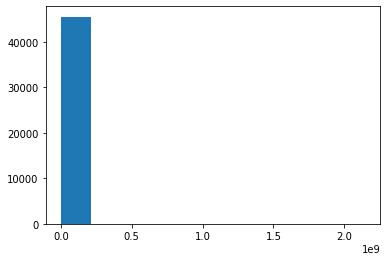

In [32]:
plt.hist(train_df['familysize'])

In [33]:
train_df['familysize'].unique()

array([         4,          3,          0,          2,          6,
                1,          5,          8,          7,          9,
              999,         11,         10,         15,         14,
               12,         21,         13,         20,         44,
               16, 2147483647,         17,        100,         34,
               30,         18], dtype=int64)

### 이상치 탐지 함수

In [34]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]
    
    print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
    
    #data = data[(data[column] < upper) & (data[column] > lower)]
    
    #test_out_idx = test_df[(test_df[column] < upper) & (test_df[column] > lower)].index
    #test_df[test_out_idx]= 평균
    
    avg = (lower + upper)/2
    
    return lower, upper, avg

## 주엽 선배 조언
* 평균값보단 빈도 높은 값으로 하기 or 가장 가까운 값

In [35]:
"""test_out_idx = test_df[(test_df['familysize'] >= upper) | (test_df['familysize'] <= lower)].index"""

"test_out_idx = test_df[(test_df['familysize'] >= upper) | (test_df['familysize'] <= lower)].index"

In [36]:
"""for i in range(test_df.index.size):
    for j in range(test_out_idx.size):
        if(test_df.index[i] == test_out_idx[j]):
            test_df['familysize'] = avg
        else:
            test_df['familysize'] = test_df['familysize']"""

"for i in range(test_df.index.size):\n    for j in range(test_out_idx.size):\n        if(test_df.index[i] == test_out_idx[j]):\n            test_df['familysize'] = avg\n        else:\n            test_df['familysize'] = test_df['familysize']"

In [37]:
test_df['familysize'].unique()

array([ 3,  2,  7,  4,  1,  0,  5,  6,  8,  9, 10, 11, 23, 12, 15, 14, 20],
      dtype=int64)

In [38]:
train_df['familysize'].unique()

array([         4,          3,          0,          2,          6,
                1,          5,          8,          7,          9,
              999,         11,         10,         15,         14,
               12,         21,         13,         20,         44,
               16, 2147483647,         17,        100,         34,
               30,         18], dtype=int64)

In [39]:
lower, upper, avg = outlier_iqr(train_df,'familysize')

IQR은 1.0 이다.
lower bound 값은 0.5 이다.
upper bound 값은 4.5 이다.
총 이상치 개수는 4916 이다.


In [40]:
combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[(dataset['familysize'] <= lower) | (dataset['familysize'] >=upper), 'familysize'] = upper
    """dataset.loc[(dataset['familysize'] <= lower), 'familysize'] = lower
    dataset.loc[(dataset['familysize'] >=upper), 'familysize'] = upper"""
    

    dataset['familysize'] = dataset['familysize'].astype(int)

combine = [train_df, test_df]

In [41]:
test_df['familysize'].unique()

array([3, 2, 4, 1])

In [42]:
train_df['familysize'].unique()

array([4, 3, 2, 1])

In [43]:
test_df['familysize'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
11378    False
11379    False
11380    False
11381    False
11382    False
Name: familysize, Length: 11383, dtype: bool

(array([ 6535.,     0.,     0., 17918.,     0.,     0., 11256.,     0.,
            0.,  9823.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

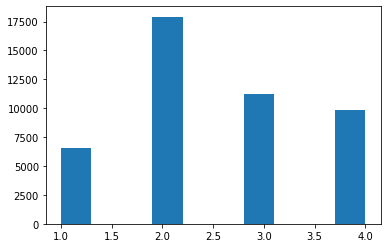

In [44]:
plt.hist(train_df['familysize'])

In [45]:
train_df[['familysize', 'voted']].groupby(['familysize'], as_index=False).mean().sort_values(by='voted', ascending=False)

,familysize,voted
0,1,1.575669
1,2,1.549894
2,3,1.543088
3,4,1.526316


In [46]:
"""familysize_mapping = {1:3, 2:2, 3:1, 4:0}

train_df['familysize'] = train_df['familysize'].map(familysize_mapping)
test_df['familysize'] = test_df['familysize'].map(familysize_mapping)"""

"familysize_mapping = {1:3, 2:2, 3:1, 4:0}\n\ntrain_df['familysize'] = train_df['familysize'].map(familysize_mapping)\ntest_df['familysize'] = test_df['familysize'].map(familysize_mapping)"

In [47]:
"""train_df[['familysize', 'voted']].groupby(['familysize'], as_index=False).mean().sort_values(by='voted', ascending=False)"""

"train_df[['familysize', 'voted']].groupby(['familysize'], as_index=False).mean().sort_values(by='voted', ascending=False)"

In [48]:
train_df[['hand', 'voted']].groupby(['hand'], as_index=False).mean().sort_values(by='voted', ascending=False)

,hand,voted
0,0,1.633540
3,3,1.592844
1,1,1.545317
2,2,1.540494


In [49]:
hand_mapping = {0:0, 3:1, 1:2, 2:3}

train_df['hand'] = train_df['hand'].map(hand_mapping)
test_df['hand'] = test_df['hand'].map(hand_mapping)

In [50]:
train_df[['hand', 'voted']].groupby(['hand'], as_index=False).mean().sort_values(by='voted', ascending=False)

,hand,voted
0,0,1.633540
1,1,1.592844
2,2,1.545317
3,3,1.540494


In [51]:
train_df[['married', 'voted']].groupby(['married'], as_index=False).mean().sort_values(by='voted', ascending=False)

,married,voted
0,0,1.677419
1,1,1.629572
3,3,1.422454
2,2,1.333433


In [52]:
married_mapping = {0:0, 1:1, 3:2, 2:3}

train_df['married'] = train_df['married'].map(married_mapping)
test_df['married'] = test_df['married'].map(married_mapping)

In [53]:
train_df[['urban', 'voted']].groupby(['urban'], as_index=False).mean().sort_values(by='voted', ascending=False)

,urban,voted
3,3,1.580402
2,2,1.541545
1,1,1.492872
0,0,1.490683


(array([4.5525e+04, 2.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.5000000e+01, 2.4141850e+05, 4.8281200e+05, 7.2420550e+05,
        9.6559900e+05, 1.2069925e+06, 1.4483860e+06, 1.6897795e+06,
        1.9311730e+06, 2.1725665e+06, 2.4139600e+06]),
 <BarContainer object of 10 artists>)

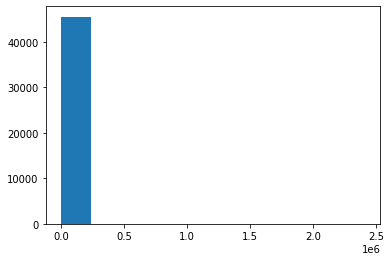

In [54]:
plt.hist(train_df['QaE'])

In [55]:
lower, upper, avg = outlier_iqr(train_df,'QaE')

IQR은 423.0 이다.
lower bound 값은 -230.5 이다.
upper bound 값은 1461.5 이다.
총 이상치 개수는 3380 이다.


In [56]:
combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[(dataset['QaE'] <= lower) | (dataset['QaE'] >=upper), 'QaE'] = upper
    """dataset.loc[(dataset['QaE'] <= lower), 'QaE'] = lower
    dataset.loc[(dataset['QaE'] >=upper), 'QaE'] = upper"""

    dataset['QaE'] = dataset['QaE'].astype(int)

combine = [train_df, test_df]

In [57]:
train_df['QaE'].unique()

array([ 363,  647, 1461, ...,   68,  175,  126])

In [58]:
combine = [train_df, test_df]

test_df['QaE'].fillna(test_df['QaE'].dropna().median(), inplace=True)
train_df['QaE'].fillna(train_df['QaE'].dropna().median(), inplace=True)

train_df['QaE_band'] = pd.qcut(train_df['QaE'], 10)

train_df[['QaE_band', 'voted']].groupby(['QaE_band'], as_index=False).mean().sort_values(by='QaE_band', ascending=True)

,QaE_band,voted
0,"(24.999, 320.0]",1.624016
1,"(320.0, 377.0]",1.597213
2,"(377.0, 430.0]",1.565447
3,"(430.0, 488.0]",1.552049
4,"(488.0, 557.0]",1.546351
5,"(557.0, 637.0]",1.541049
6,"(637.0, 752.0]",1.525121
7,"(752.0, 924.0]",1.515198
8,"(924.0, 1276.0]",1.500439
9,"(1276.0, 1461.0]",1.500440


In [59]:
for dataset in combine:
    dataset.loc[ dataset['QaE'] <= 320.0, 'QaE'] = 9
    dataset.loc[(dataset['QaE'] > 320.0) & (dataset['QaE'] <= 377.0), 'QaE'] = 8
    dataset.loc[(dataset['QaE'] > 377.0) & (dataset['QaE'] <=430.0), 'QaE'] = 7
    dataset.loc[(dataset['QaE'] > 430.0) & (dataset['QaE'] <=488.0), 'QaE'] = 6
    dataset.loc[(dataset['QaE'] > 488.0) & (dataset['QaE'] <=557.0), 'QaE'] = 5
    dataset.loc[(dataset['QaE'] > 557.0) & (dataset['QaE'] <=615.0), 'QaE'] = 4
    dataset.loc[(dataset['QaE'] > 615.0) & (dataset['QaE'] <=664.0), 'QaE'] = 3
    dataset.loc[(dataset['QaE'] > 664.0) & (dataset['QaE'] <=790.0), 'QaE'] = 2
    dataset.loc[(dataset['QaE'] > 790.0) & (dataset['QaE'] <=987.0), 'QaE'] = 1
    dataset.loc[ dataset['QaE'] > 987.0, 'QaE'] = 0
    dataset['QaE'] = dataset['QaE'].astype(int)

train_df = train_df.drop(['QaE_band'], axis=1)
combine = [train_df, test_df]

In [60]:
train_df['QaE'].unique()

array([8, 3, 0, 5, 1, 7, 6, 2, 9, 4])

In [61]:
lower, upper, avg = outlier_iqr(train_df,'QbE')

IQR은 963.0 이다.
lower bound 값은 -569.5 이다.
upper bound 값은 3282.5 이다.
총 이상치 개수는 3652 이다.


In [62]:
combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[(dataset['QbE'] <= lower) | (dataset['QbE'] >=upper), 'QbE'] = upper
    """dataset.loc[(dataset['QbE'] <= lower), 'QbE'] = lower
    dataset.loc[(dataset['QbE'] >=upper), 'QbE'] = upper"""

    dataset['QbE'] = dataset['QbE'].astype(int)

combine = [train_df, test_df]

In [63]:
combine = [train_df, test_df]
test_df['QbE'].fillna(test_df['QbE'].dropna().median(), inplace=True)
train_df['QbE'].fillna(train_df['QbE'].dropna().median(), inplace=True)
train_df['QbE_band'] = pd.qcut(train_df['QbE'], 10)
train_df[['QbE_band', 'voted']].groupby(['QbE_band'], as_index=False).mean().sort_values(by='QbE_band', ascending=True)

,QbE_band,voted
0,"(24.999, 662.0]",1.613164
1,"(662.0, 812.0]",1.557663
2,"(812.0, 938.0]",1.558191
3,"(938.0, 1071.0]",1.545633
4,"(1071.0, 1218.0]",1.536714
5,"(1218.0, 1404.0]",1.528174
6,"(1404.0, 1660.0]",1.534536
7,"(1660.0, 2076.0]",1.530150
8,"(2076.0, 2941.9]",1.526813
9,"(2941.9, 3282.0]",1.536891


In [64]:
for dataset in combine:
    dataset.loc[ dataset['QbE'] <= 662.0, 'QaE'] = 9
    dataset.loc[(dataset['QbE'] > 662.0) & (dataset['QbE'] <= 812.0), 'QbE'] = 8
    dataset.loc[(dataset['QbE'] > 812.0) & (dataset['QbE'] <=938.0), 'QbE'] = 7
    dataset.loc[(dataset['QbE'] > 938.0) & (dataset['QbE'] <=1071.0), 'QbE'] = 6
    dataset.loc[(dataset['QbE'] > 1071.0) & (dataset['QbE'] <=1218.0), 'QbE'] = 5
    dataset.loc[(dataset['QbE'] > 1218.0) & (dataset['QbE'] <=1356.0), 'QbE'] = 4
    dataset.loc[(dataset['QbE'] > 1356.0) & (dataset['QbE'] <=1446.0), 'QbE'] = 3
    dataset.loc[(dataset['QbE'] > 1446.0) & (dataset['QbE'] <=1725.0), 'QbE'] = 2
    dataset.loc[(dataset['QbE'] > 1725.0) & (dataset['QbE'] <= 2186.0), 'QbE'] = 1
    dataset.loc[ dataset['QbE'] >  2186.0, 'QaE'] = 0
    dataset['QbE'] = dataset['QbE'].astype(int)

train_df = train_df.drop(['QbE_band'], axis=1)
combine = [train_df, test_df]

In [65]:
lower, upper, avg = outlier_iqr(train_df,'QcE')

IQR은 684.0 이다.
lower bound 값은 -375.0 이다.
upper bound 값은 2361.0 이다.
총 이상치 개수는 3679 이다.


In [66]:
combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[(dataset['QcE'] <= lower) | (dataset['QcE'] >=upper), 'QcE'] = upper
    """dataset.loc[(dataset['QcE'] <= lower), 'QcE'] = lower
    dataset.loc[(dataset['QcE'] >=upper), 'QcE'] = upper"""

    dataset['QcE'] = dataset['QcE'].astype(int)

combine = [train_df, test_df]

In [67]:
combine = [train_df, test_df]
test_df['QcE'].fillna(test_df['QcE'].dropna().median(), inplace=True)
train_df['QcE'].fillna(train_df['QcE'].dropna().median(), inplace=True)
train_df['QcE_band'] = pd.qcut(train_df['QcE'], 10)
train_df[['QcE_band', 'voted']].groupby(['QcE_band'], as_index=False).mean().sort_values(by='QcE_band', ascending=True)

,QcE_band,voted
0,"(24.999, 497.0]",1.612565
1,"(497.0, 604.0]",1.570359
2,"(604.0, 698.0]",1.557578
3,"(698.0, 793.0]",1.554212
4,"(793.0, 899.0]",1.554143
5,"(899.0, 1033.0]",1.531685
6,"(1033.0, 1212.0]",1.538766
7,"(1212.0, 1502.0]",1.515032
8,"(1502.0, 2118.0]",1.515945
9,"(2118.0, 2361.0]",1.517461


In [68]:
for dataset in combine:
    dataset.loc[ dataset['QcE'] <= 497.0, 'QcE'] = 9
    dataset.loc[(dataset['QcE'] > 497.0) & (dataset['QcE'] <= 604.0), 'QcE'] = 8
    dataset.loc[(dataset['QcE'] > 604.0) & (dataset['QcE'] <=698.0), 'QcE'] = 7
    dataset.loc[(dataset['QcE'] > 698.0) & (dataset['QcE'] <=793.0), 'QcE'] = 6
    dataset.loc[(dataset['QcE'] > 793.0) & (dataset['QcE'] <=899.0), 'QcE'] = 5
    dataset.loc[(dataset['QcE'] > 899.0) & (dataset['QcE'] <=993.0), 'QcE'] = 4
    dataset.loc[(dataset['QcE'] > 993.0) & (dataset['QcE'] <=1062.0), 'QcE'] = 3
    dataset.loc[(dataset['QcE'] > 1062.0) & (dataset['QcE'] <=1254.0), 'QcE'] = 2
    dataset.loc[(dataset['QcE'] > 1254.0) & (dataset['QcE'] <= 1581.0), 'QcE'] = 1
    dataset.loc[ dataset['QcE'] >  1581.0, 'QaE'] = 0
    dataset['QcE'] = dataset['QcE'].astype(int)

train_df = train_df.drop(['QcE_band'], axis=1)
combine = [train_df, test_df]

In [69]:
lower, upper, avg = outlier_iqr(train_df,'QdE')

combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[(dataset['QdE'] <= lower) | (dataset['QdE'] >=upper), 'QdE'] = upper
    """dataset.loc[(dataset['QbE'] <= lower), 'QbE'] = lower
    dataset.loc[(dataset['QbE'] >=upper), 'QbE'] = upper"""

    dataset['QbE'] = dataset['QbE'].astype(int)

combine = [train_df, test_df]

combine = [train_df, test_df]
test_df['QdE'].fillna(test_df['QdE'].dropna().median(), inplace=True)
train_df['QdE'].fillna(train_df['QdE'].dropna().median(), inplace=True)
train_df['QdE_band'] = pd.qcut(train_df['QdE'], 10)
train_df[['QdE_band', 'voted']].groupby(['QdE_band'], as_index=False).mean().sort_values(by='QdE_band', ascending=True)

IQR은 676.0 이다.
lower bound 값은 -335.0 이다.
upper bound 값은 2369.0 이다.
총 이상치 개수는 3614 이다.


,QdE_band,voted
0,"(25.999, 520.0]",1.608448
1,"(520.0, 631.0]",1.559526
2,"(631.0, 726.0]",1.551400
3,"(726.0, 822.0]",1.551845
4,"(822.0, 931.0]",1.536110
5,"(931.0, 1064.0]",1.537307
6,"(1064.0, 1238.0]",1.533981
7,"(1238.0, 1507.8]",1.537986
8,"(1507.8, 2118.9]",1.516143
9,"(2118.9, 2369.0]",1.535134


In [70]:
for dataset in combine:
    dataset.loc[ dataset['QdE'] <= 520.0, 'QcE'] = 9
    dataset.loc[(dataset['QdE'] > 520.0) & (dataset['QdE'] <= 631.0), 'QdE'] = 8
    dataset.loc[(dataset['QdE'] > 631.0) & (dataset['QdE'] <=726.0), 'QdE'] = 7
    dataset.loc[(dataset['QdE'] > 726.0) & (dataset['QdE'] <=822.0), 'QdE'] = 6
    dataset.loc[(dataset['QdE'] > 822.0) & (dataset['QdE'] <=931.0), 'QdE'] = 5
    dataset.loc[(dataset['QdE'] > 931.0) & (dataset['QdE'] <=1064.0), 'QdE'] = 4
    dataset.loc[(dataset['QdE'] > 1064.0) & (dataset['QdE'] <=1238.0), 'QdE'] = 3
    dataset.loc[(dataset['QdE'] > 1238.0) & (dataset['QdE'] <=1507.0), 'QdE'] = 2
    dataset.loc[(dataset['QdE'] > 1507.0) & (dataset['QdE'] <=  2118.0), 'QdE'] = 1
    dataset.loc[ dataset['QdE'] >   2118.0, 'QdE'] = 0
    dataset['QdE'] = dataset['QdE'].astype(int)

train_df = train_df.drop(['QdE_band'], axis=1)
combine = [train_df, test_df]

In [71]:
lower, upper, avg = outlier_iqr(train_df,'QeE')



combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[(dataset['QeE'] <= lower) | (dataset['QeE'] >=upper), 'QeE'] = upper
    #dataset.loc[(dataset['QbE'] <= lower), 'QbE'] = lower
    #dataset.loc[(dataset['QbE'] >=upper), 'QbE'] = upper

    dataset['QeE'] = dataset['QeE'].astype(int)

combine = [train_df, test_df]

combine = [train_df, test_df]
test_df['QeE'].fillna(test_df['QeE'].dropna().median(), inplace=True)
train_df['QeE'].fillna(train_df['QeE'].dropna().median(), inplace=True)
train_df['QeE_band'] = pd.qcut(train_df['QeE'], 10)
train_df[['QeE_band', 'voted']].groupby(['QeE_band'], as_index=False).mean().sort_values(by='QeE_band', ascending=True)

IQR은 822.0 이다.
lower bound 값은 -399.0 이다.
upper bound 값은 2889.0 이다.
총 이상치 개수는 3788 이다.


,QeE_band,voted
0,"(24.999, 610.0]",1.577496
1,"(610.0, 769.0]",1.542712
2,"(769.0, 898.0]",1.557697
3,"(898.0, 1021.0]",1.552033
4,"(1021.0, 1154.0]",1.548217
5,"(1154.0, 1304.0]",1.539956
6,"(1304.0, 1516.0]",1.545714
7,"(1516.0, 1848.0]",1.527601
8,"(1848.0, 2617.0]",1.513074
9,"(2617.0, 2889.0]",1.563516


In [72]:
for dataset in combine:
    dataset.loc[ dataset['QeE'] <= 610.0, 'QeE'] = 9
    dataset.loc[(dataset['QeE'] > 610.0) & (dataset['QeE'] <= 769.0), 'QeE'] = 8
    dataset.loc[(dataset['QeE'] > 769.0) & (dataset['QeE'] <=898.0), 'QeE'] = 7
    dataset.loc[(dataset['QeE'] > 898.0) & (dataset['QeE'] <=1021.0), 'QeE'] = 6
    dataset.loc[(dataset['QeE'] > 1021.0) & (dataset['QeE'] <=1154.0), 'QeE'] = 5
    dataset.loc[(dataset['QeE'] > 1154.0) & (dataset['QeE'] <=1304.0), 'QeE'] = 4
    dataset.loc[(dataset['QeE'] > 1304.0) & (dataset['QeE'] <=1516.0), 'QeE'] = 3
    dataset.loc[(dataset['QeE'] > 1516.0) & (dataset['QeE'] <=1848.0), 'QeE'] = 2
    dataset.loc[(dataset['QeE'] > 1848.0) & (dataset['QeE'] <=  2617.0), 'QeE'] = 1
    dataset.loc[ dataset['QeE'] >   2617.0, 'QdE'] = 0
    dataset['QeE'] = dataset['QeE'].astype(int)

train_df = train_df.drop(['QeE_band'], axis=1)
combine = [train_df, test_df]

In [73]:
lower, upper, avg = outlier_iqr(train_df,'QfE')



combine = [train_df, test_df]

for dataset in combine:
    dataset.loc[(dataset['QfE'] <= lower) | (dataset['QfE'] >=upper), 'QfE'] = upper
    #dataset.loc[(dataset['QbE'] <= lower), 'QbE'] = lower
    #dataset.loc[(dataset['QbE'] >=upper), 'QbE'] = upper

    dataset['QfE'] = dataset['QfE'].astype(int)

combine = [train_df, test_df]

combine = [train_df, test_df]
test_df['QfE'].fillna(test_df['QfE'].dropna().median(), inplace=True)
train_df['QfE'].fillna(train_df['QfE'].dropna().median(), inplace=True)
train_df['QfE_band'] = pd.qcut(train_df['QfE'], 10)
train_df[['QfE_band', 'voted']].groupby(['QfE_band'], as_index=False).mean().sort_values(by='QfE_band', ascending=True)

IQR은 574.0 이다.
lower bound 값은 -357.0 이다.
upper bound 값은 1939.0 이다.
총 이상치 개수는 3646 이다.


,QfE_band,voted
0,"(24.999, 384.0]",1.600131
1,"(384.0, 465.0]",1.585200
2,"(465.0, 541.0]",1.558636
3,"(541.0, 622.0]",1.556831
4,"(622.0, 712.0]",1.543469
5,"(712.0, 823.0]",1.536972
6,"(823.0, 975.0]",1.517484
7,"(975.0, 1215.0]",1.518804
8,"(1215.0, 1731.0]",1.518120
9,"(1731.0, 1939.0]",1.532205


In [74]:
for dataset in combine:
    dataset.loc[ dataset['QfE'] <= 384.0, 'QfE'] = 9
    dataset.loc[(dataset['QfE'] > 384.0) & (dataset['QfE'] <= 465.0), 'QfE'] = 8
    dataset.loc[(dataset['QfE'] > 465.0) & (dataset['QfE'] <=541.0), 'QfE'] = 7
    dataset.loc[(dataset['QfE'] > 541.0) & (dataset['QfE'] <=622.0), 'QfE'] = 6
    dataset.loc[(dataset['QfE'] > 622.0) & (dataset['QfE'] <=712.0), 'QfE'] = 5
    dataset.loc[(dataset['QfE'] > 712.0) & (dataset['QfE'] <=823.0), 'QfE'] = 4
    dataset.loc[(dataset['QfE'] > 823.0) & (dataset['QfE'] <=975.0), 'QfE'] = 3
    dataset.loc[(dataset['QfE'] > 975.0) & (dataset['QfE'] <=1215.0), 'QfE'] = 2
    dataset.loc[(dataset['QfE'] > 1215.0) & (dataset['QfE'] <=  1731.0), 'QfE'] = 1
    dataset.loc[ dataset['QfE'] >   1731.0, 'QfE'] = 0
    dataset['QfE'] = dataset['QfE'].astype(int)

train_df = train_df.drop(['QfE_band'], axis=1)
combine = [train_df, test_df]

In [75]:
Y_train = train_df["voted"]

## 정규화 및 표준화

#### 정규화의 목적 : 데이터 셋의 numerical value 범위의 차이를 왜곡하지 않고 공통 척도로 변경하는 것
* 모든 데이터 셋이 정규화 될 필요는 없고, 피처의 범위가 다른 경우에만 필요하다.
* 정규화는 특성 벡터의 길이는 상관 없고 데이터의 방향만이 중요할 때 많이 사용된다.

* Normalization
    * 스케일링 시 최대, 최소값이 사용됨
    * 피처의 크기가 다를 때 사용
    * [0,1] 또는 [-1,1] 사이의 값으로 스케일링
    * 분포에 대해 모를 때 유용
    * MinMaxScaler, Normalizer
* Standardization
    * 스케일링 시 평균과 표준편차가 사용
    * 평균이 0, 표준편차가 1인 것을 확인하고 싶을 때 사용
    * 특정 범위로 제한되지 않음
    * 피처가 정규분포(가우시안 분표)인 경우 유용
    * StandarScaler, RobustScaler

* 정규화와 표준화가 필요한 순간 -> 명확한 답은 없다
    * 통상적으로 -> 표준화를 통해 이상치를 제거하고, 그 다음 데이터를 정규화 해 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작
    * 기준을 설정하고 그 기준내에서 각 데이터들을 평가하기 때문에 비교가 편함
    * scale의 범위가 너무 크면 노이즈 데이터가 생성되거나 overfitting이 될 가능성이 높아짐

In [76]:
"""scaler = StandardScaler()
scaler.fit(train_df)

train_scaled = scaler.transform(train_df) 

trind_scaled_df = pd.DataFrame(train_scaled, columns=train_df.columns)
train_df = trind_scaled_df

scaler.fit(test_df)

test_scaled = scaler.transform(test_df) 

test_scaled_df = pd.DataFrame(test_scaled, columns=test_df.columns)
test_df = test_scaled_df"""

'scaler = StandardScaler()\nscaler.fit(train_df)\n\ntrain_scaled = scaler.transform(train_df) \n\ntrind_scaled_df = pd.DataFrame(train_scaled, columns=train_df.columns)\ntrain_df = trind_scaled_df\n\nscaler.fit(test_df)\n\ntest_scaled = scaler.transform(test_df) \n\ntest_scaled_df = pd.DataFrame(test_scaled, columns=test_df.columns)\ntest_df = test_scaled_df'

## 학습

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


train_df = train_df.astype('int')
test_df = test_df.astype('int')


X_train = train_df.drop("voted", axis = 1)
X_test  = test_df.drop("index", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape




"""decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree



gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian"""

"""random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest"""

'random_forest = RandomForestClassifier(n_estimators=100)\nrandom_forest.fit(X_train, Y_train)\nY_pred = random_forest.predict(X_test)\nrandom_forest.score(X_train, Y_train)\nacc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)\nacc_random_forest'

# 분류 모델
* 이진 분류 - 출력하는 타깃 클래스가 두 개뿐인 학습 작업
* 다중 범주 문제 - 세 가지 이상의 타깃 클래스가 있는 문제

-------------------------------------------------------------------------------------

* scikit-learn - 기계 학습 오픈 소스 라이브러리 : 아나콘다에서 기본적으로 제공한다
    * 지도 학습 - 서포트 벡터 머신, 나이브 베이즈(Naïve Bayes), 결정 트리(Decision Tree)
    * 비지도 학습 - 군집화, 이상치 검출

    * 모델 선택 및 평가 - 교차 검증(cross-validation), 파이프라인(pipeline)
    * 데이터 변환 - 속성 추출(Feature Extraction), 전처리(Preprocessing)

## 1. K-NN  : K-Nearest Neighbors
* 알려진 범주로 알려지지 않은 범주 분류
* 기존의 범주가 존재해야 함
* 결측치(NA) 및 이상치 전처리 중요
* 많은 특징을 갖는 데이터 셋은 부적합
* 유클리드 거리 게산식 이용 -> 가장 유사한 범주를 가장 가까운 거리를 통해 선택
    * 적용 분야 : 개인별 영화 추천, 이미지/비디오에서 얼굴 또는 글자 인식, 유전자 데이터 패턴 식별

## 2. NB : Naive Bayes
* 통계적 분류기
* 주어진 데이터가 특정 클래스에 속하는지를 확률을 통해서 예측 -> 조건부 확률 이용
* 베이즈 확률 정리를 적용한 기계학습 방법 -> 사전/사후 확률 사이의 관계를 나타낸 이론
* 특정 영역에서는 DT나 KNN 분류기보다 성능이 우수
* 텍스트 데이터처럼 희소한 고차원인 경우 높은 정확도와 속도 제공
    * 적용 분야 : 스팸 메일 분류, 문서(주제) 분류, 비 유무 예측, 컴퓨터 네트워크 상 침입자 분류(악성코드 유무)

## 3. SVM : Support Vector Machine
* SVM 알고리즘 : 가상의 직선을 중심으로 거리를 계산하여 최대의 직사각형 형태로 영역을 넓힌다. -> margin을 최대로 만드는 알고리즘
* 이진 분류 : 두 범주를 직선으로 분류 / 선형 분리 : 두 개의 집합을 직선으로 분리
* KNN + 선형 회귀 모델링 기법 = 분류와 수치 예측 가능
* 비선형 분류를 위해서 데이터의 차원을 고차원으로 변경하여 직선으로 분리 = 커널 트릭
    * 커널 트릭 : 비선형 관계를 선형으로 변환하는 역할
    * 커널 트릭에 사용되는 커널 함수 : linear(Gaussian), polynomial radial, sigmoid
* 다양한 데이터 셋에서 잘 동작하는 강력한 모델
* 데이터의 특징이 적어도 복잡한 결정 경계 생성 -> 모든 특징과 스케일이 비슷한 경우에 유리함
* 샘플(관측치)이 많은 경우 불리함 (100,000개 이상)

    * 적용 분야 : 바이오인포매틱스의 마이크로 유전자 데이터 분류, 인간의 얼굴/ 문자/ 숫자 인식- 이미지 데이터 패턴 인식에 적합

* 참고 자료 : https://joyfuls.tistory.com/60

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
import math

In [80]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [81]:
model=LinearRegression()
# random_state is an arbitrary number.
model.fit(X_train, Y_train)
predictions=model.predict(X_test)

Y_pred_linear = np.round(predictions, 0)

acc_linear = round(model.score(X_train, Y_train) * 100, 2)
acc_linear

18.74

In [82]:
import xgboost as xgb

# 모델 선언
my_model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)

# 모델 훈련
my_model.fit(X_train, Y_train, verbose=False)

# 모델 예측
y_pred_xgb = my_model.predict(X_test)

acc_xgb = round(my_model.score(X_train, Y_train) * 100, 2)
acc_xgb

29.18

##### NB 모델 학습

In [83]:
from sklearn.datasets import load_iris # dataset
from sklearn.naive_bayes import GaussianNB # model 생성
from sklearn.model_selection import train_test_split # train/test set
from sklearn.metrics import accuracy_score, confusion_matrix # model 평가

In [84]:
model = GaussianNB()
model.fit(X_train, Y_train)
y_pred_NB = model.predict(X_test)

acc_NB = round(model.score(X_train, Y_train) * 100, 2)
acc_NB

46.1

##### SVM 모델 학습

In [85]:
from sklearn.datasets import load_iris # dataset
from sklearn.svm import SVC # model 생성
from sklearn.model_selection import train_test_split # train/test set
from sklearn.metrics import accuracy_score, confusion_matrix # model 평가

In [86]:
"""train_df = train_df.astype('int')
test_df = test_df.astype('int')


X_train = train_df.drop("voted", axis = 1)
X_test  = test_df.drop("index", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape"""

#help(SVC)
model = SVC()
model.fit(X_train, Y_train)
y_pred_svm = model.predict(X_test)

acc_svm = round(model.score(X_train, Y_train) * 100, 2)
acc_svm

54.73

In [87]:
Y_pred

array([2, 2, 2, ..., 1, 1, 2], dtype=int64)

### csv파일 만들기

In [88]:
y_pred_NB
submission = pd.read_csv('C:/Users/Kong/Desktop/이지민/AI/심리_성향_예측_AI/sample_submission.csv')
submission['voted'] = y_pred_NB
submission.describe()

,index,voted
count,11383.000000,11383.000000
mean,5691.000000,1.054116
std,3286.133391,0.226256
min,0.000000,1.000000
25%,2845.500000,1.000000
50%,5691.000000,1.000000
75%,8536.500000,1.000000
max,11382.000000,2.000000


In [89]:
"""submission.to_csv('pred_8_NB.csv',index=False)"""

"submission.to_csv('pred_8_NB.csv',index=False)"